# Linear Regression

Let us implement Linear Regression on Boston house pricing data set to predict the Price of a house based on various features.

In [0]:
#Import Required libraries
import pandas as pd
from sklearn.datasets import load_boston                          #To load the data set
import seaborn as sns                                             #For visualisations
from sklearn.model_selection import train_test_split              #To split train and test data set
from sklearn.linear_model import LinearRegression                 #To implement Linear Regression model
from sklearn import metrics                                       #To measure accuracy of our model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Load the data set
boston_df=load_boston()

In [0]:
#Convert this dataset into Pandas dataframe
df=pd.DataFrame(boston_df.data)
df.columns=boston_df.feature_names
df['Price']=boston_df.target

In [0]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Find out what each variable signifies
print (boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Exploratory Data Analysis

Text(0, 0.5, 'Number of houses')

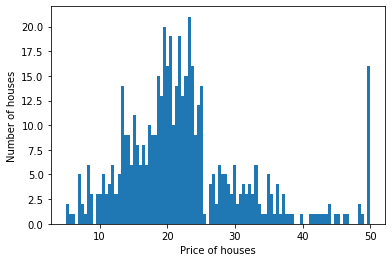

In [0]:
#Find out how many houses are falling in each of price range
plt.hist(df.Price,bins=100)
plt.xlabel("Price of houses")
plt.ylabel("Number of houses")

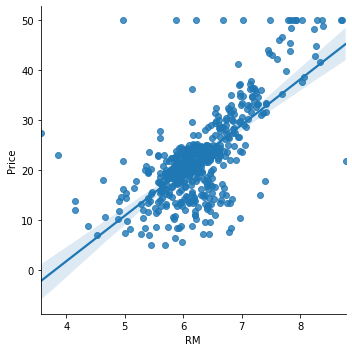

In [0]:
#Room numbers and Price as linearly correlated
sns.lmplot('RM','Price',df)

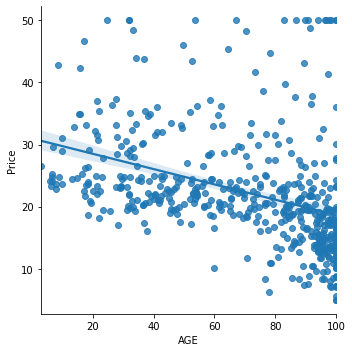

In [0]:
#Age of the house and its price are negatively correlated
sns.lmplot('AGE','Price',df)

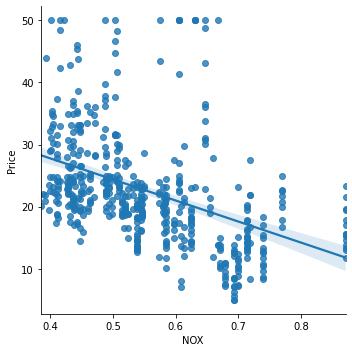

In [0]:
#nitric oxides concentration and house price are negatively correlated
sns.lmplot('NOX','Price',df)

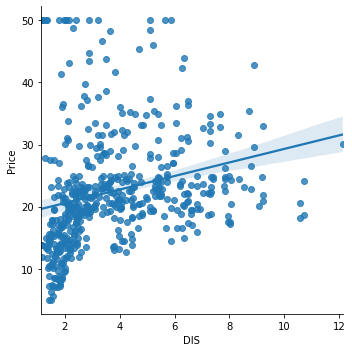

In [0]:
#weighted distances to five Boston employment centres and Price are slightly correlated
sns.lmplot('DIS','Price',df)

In [0]:
#Seperate Dependant and Independant variables
x = df.drop(columns=['Price'])
y = df['Price']

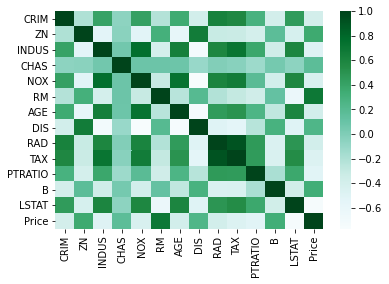

In [0]:
#Heat map of Correlation of variables
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='BuGn')

In [0]:
# VIF for the data
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
'''

import numpy as np
import pandas as pd
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        print(vif) 
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]
'''


"\n\nimport numpy as np\nimport pandas as pd\nimport time\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor    \nfrom joblib import Parallel, delayed\n\n# Defining the function that you will run later\ndef calculate_vif_(X, thresh=5.0):\n    variables = [X.columns[i] for i in range(X.shape[1])]\n    dropped=True\n    while dropped:\n        dropped=False\n        print(len(variables))\n        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))\n\n        maxloc = vif.index(max(vif))\n        print(vif) \n        if max(vif) > thresh:\n            print(time.ctime() + ' dropping '' + X[variables].columns[maxloc] + '' at index: ' + str(maxloc))\n            variables.pop(maxloc)\n            dropped=True\n\n    print('Remaining variables:')\n    print([variables])\n    return X[[i for i in variables]]\n"

In [0]:
'''
X = x.copy(deep=True)
x = calculate_vif_(X,8)
'''

'\nX = x.copy(deep=True)\nx = calculate_vif_(X,8)\n'

In [0]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [0]:
'''
pca = PCA(n_components=0.98)
x_transformed = pca.fit_transform(x)
x_trans = pd.DataFrame(x_transformed)
'''

In [0]:
0,1,2,3,4,5,6,7,8
0,1,4,9,16,25,36,49,64

In [0]:
x_trans

,0,1,2
0,-119.818843,-5.560056,-3.172693
1,-168.890155,10.116209,-30.781887
2,-169.311707,14.080532,-16.753628
3,-190.230642,18.302463,-6.534195
4,-190.133451,16.097947,-13.158520
...,...,...,...
501,-138.697933,5.781485,-20.978012
502,-139.504439,1.039389,-26.794150
503,-138.387163,0.938092,-37.285181
504,-137.505173,4.251825,-35.988342


In [0]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [0]:
#Split our data set into train and test data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=111 )
#xtrain, xtest, ytrain, ytest = train_test_split(x_trans, y, test_size = 0.3, random_state=111 )#

In [0]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [0]:
xtrain.shape[0] + xtest.shape[0]

506

# Linear Regression model Implementation

In [0]:
import statsmodels.api as sm

In [0]:
mod = sm.OLS(ytrain, xtrain)

In [0]:
res = mod.fit()

In [0]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              661.7
Date:                Sat, 25 Apr 2020   Prob (F-statistic):                   7.56e-233
Time:                        09:24:44   Log-Likelihood:                         -1048.2
No. Observations:                 354   AIC:                                      2122.
Df Residuals:                     341   BIC:                                      2173.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [0]:
y_pred = res.predict(xtest)

In [0]:
metrics.mean_squared_error(y_pred,ytest)

30.995385439974573

In [0]:

lr = LinearRegression()
lr = lr.fit(xtrain, ytrain)

In [0]:
#Find out intercept of model
lr.intercept_

22.465189904701358

In [0]:
#Find out coeffcients of the model
print(len(lr.coef_))
print(lr.coef_)
print(df.columns)

3
[-0.02532177 -0.00853561  0.07596095]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [0]:
#Create a data frame to find out coefficients of variables
coeffdf = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficients'])

In [0]:
coeffdf

,Coefficients
CRIM,-0.138865
ZN,0.083614
INDUS,-0.261729
CHAS,3.205088
DIS,-1.560520
RAD,0.006814
LSTAT,-0.858025


In [0]:
#Find out performance of model on train set
lr.score(xtrain, ytrain)

0.3140638020443165

In [0]:
#Find out performance of model on test set
lr.score(xtest, ytest)

0.2333202901404613

In [0]:
#Predict on test data set using the model
pred = lr.predict(xtest)

In [0]:
#Create a dataframe to compare between Actual and Predicted
comparisontab = pd.DataFrame({'Actual': ytest, 'Predicted': pred})

In [0]:
comparisontab.head()

,Actual,Predicted
93,25.0,28.732544
223,30.1,28.072803
39,30.8,34.733893
122,20.5,15.999871
203,48.5,37.361992


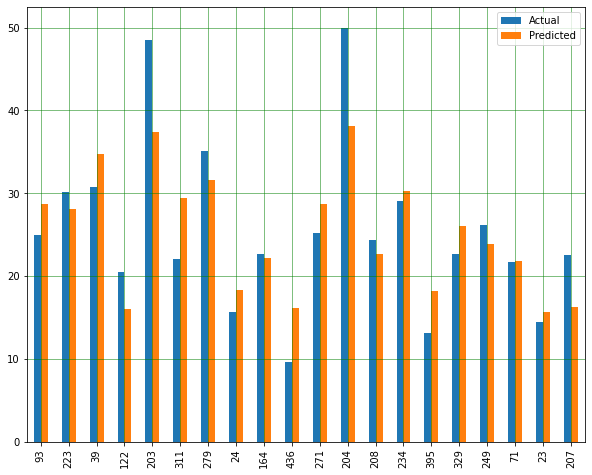

In [0]:
#Plot Actalu and Predicted

comparisontab.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
#Calculate MAE, RMSE, MSE

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, pred)))

Mean Absolute Error: 4.532458786794264
Mean Squared Error: 40.23867513855247
Root Mean Squared Error: 6.343396183319506


In [0]:
# Adding PCA 


In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=0.9)

In [0]:
x_transformed = pca.fit_transform(x)

In [0]:
x_transformed.shape

(506, 3)

In [0]:
x_transformed.shape

(506, 3)